# Section 08 - More Classification
### Introduction to Data Science EN.553.436/EN.553.636 - Fall 2021

For this analysis we will use the phoneme data set from OpenML. Read the full description [here](https://www.openml.org/d/1489), but key details are below:

Features:
- V1: Amplitude of first harmonic
- V2: Amplitude of second harmonic
- V3: Amplitude of third harmonic
- V4: Amplitude of fourth harmonic
- V5: Amplitude of fifth harmonic

Classes:
- 1 - Nasal vowel
- 2 - Oral vowel

You will first need to download the .csv file on blackboard, and save it in the same folder as this notebook.

In [3]:
## Import data set
import pandas as pd
import numpy as np
vowel_df = pd.read_csv("vowel_data.csv")
display(vowel_df)

,V1,V2,V3,V4,V5,Class
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418,1
1,-0.641265,0.109245,0.292130,-0.916804,0.240223,1
2,0.870593,-0.459862,0.578159,0.806634,0.835248,1
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583,1
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127,1
...,...,...,...,...,...,...
5399,-0.658318,1.331760,-0.081621,1.794253,-1.082181,1
5400,-0.044375,-0.010512,0.030989,-0.019379,1.281061,2
5401,0.246882,-0.793228,1.190101,1.423194,-1.303036,2
5402,-0.778907,-0.383111,1.727029,-1.432389,-1.208085,1


To make this data easier to graph and visualize, we will only work with the first two features and drop the rest:

In [4]:
X = np.array(vowel_df[['V1','V2']])
y = np.array(vowel_df['Class'])
print('Features 1 and 2: \n')
print(X)
print('\n Class:')
print(y)

Features 1 and 2: 

[[ 0.489927 -0.451528]
 [-0.641265  0.109245]
 [ 0.870593 -0.459862]
 ...
 [ 0.246882 -0.793228]
 [-0.778907 -0.383111]
 [-0.794604 -0.640053]]

 Class:
[1 1 1 ... 2 1 2]


# 1. Quadratic Discriminant Analysis (QDA)

## 1.1
**Use a 30% train-test split and implement QDA and LDA on the same data (Use random state 235). Compare the accuracy scores between QDA and LDA.**

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
##

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=235)

QDA_model = QDA().fit(X_train,y_train)
y_predict_QDA = QDA_model.predict(X_test)
print('QDA Accuracy: ' + str(accuracy_score(y_predict_QDA,y_test)))


LDA_model = LDA().fit(X_train,y_train)
y_predict_LDA = LDA_model.predict(X_test)
print('LDA Accuracy: ' + str(accuracy_score(y_predict_LDA,y_test)))

QDA Accuracy: 0.6985203452527744
LDA Accuracy: 0.687422934648582


## 1.2 
**Compare the prediction results from QDA and LDA. Determine the number of test data points for which QDA and LDA predicted different classes.**

In [6]:
diff = (y_predict_QDA != y_predict_LDA)
print('Total points with different predictions: ' + str(np.sum(diff)))
print('Ratio of points with different predictions: ' + str(np.sum(diff)/len(diff)))

Total points with different predictions: 462
Ratio of points with different predictions: 0.2848335388409371


## 1.3
When we are dealing with 2 classes, we can plot a decision boundary where the probability of Class 1 is equal to the probability of Class 2. This concept becomes much less straightforward when dealing with more than 2 classes.

The plot below shows the decision boundaries for QDA and LDA (Which one is which?), along with the actual classes for each of the test points.

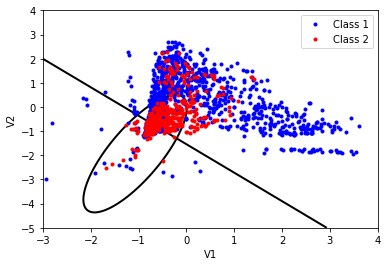

In [12]:
import matplotlib.pyplot as plt

x_min = -3
x_max = 4
y_min = -5
y_max = 4

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200)[::-1])
#print('xx:\n' + str(xx))
#print('yy:\n' + str(yy))

Z_QDA = QDA_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_QDA = Z_QDA[:, 1].reshape(xx.shape)

Z_LDA = LDA_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_LDA = Z_LDA[:,1].reshape(xx.shape)

plt.contour(xx, yy, Z_QDA, [0.50], linewidths=2, colors='black') ##Draw the boundary where P = 0.50
plt.contour(xx, yy, Z_LDA, [0.50], linewidths=2, colors ='black') ## Draw the boundary where P = 0.50

plt.plot(X_test[y_test==1,0],X_test[y_test==1,1],'.b')
plt.plot(X_test[y_test==2,0],X_test[y_test==2,1],'.r')

plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(['Class 1','Class 2'])
plt.show()
#####


**Create a new plot using the same decision boundaries, but this time add the following points from your test set (with different markers):**
- Both LDA and QDA predict class 1
- Both LDA and QDA predict class 2
- LDA and QDA have different predictions

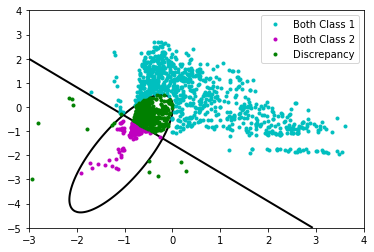

In [14]:
plt.contour(xx, yy, Z_QDA, [0.50], linewidths=2, colors='black') ##Draw the boundary where P = 0.50
plt.contour(xx, yy, Z_LDA, [0.50], linewidths=2, colors ='black') ## Draw the boundary where P = 0.50

X_both_1 = X_test[(y_predict_QDA==1)*(y_predict_LDA==1),:]
X_both_2 = X_test[(y_predict_QDA==2)*(y_predict_LDA==2),:]
X_diff = X_test[diff,:]

plt.plot(X_both_1[:,0],X_both_1[:,1],'.c')
plt.plot(X_both_2[:,0],X_both_2[:,1],'.m')
plt.plot(X_diff[:,0],X_diff[:,1],'.g')
plt.legend(['Both Class 1','Both Class 2','Discrepancy'])
plt.show()

# 2. Binary Decision Tree

## 2.1
**Using the same train and test data sets, classify the data using a binary decision tree with maximum depth 5.**

In [23]:
from sklearn import tree

Tree = tree.DecisionTreeClassifier(max_depth=15)
Tree.fit(X_train,y_train)
y_predict_tree = Tree.predict(X_test)
score = accuracy_score(y_predict_tree,y_test)
print('Accuracy: ' + str(score))

Accuracy: 0.7675709001233045


## 2.2
The following cell plots the decision boundaries of your binary tree. 
**Observe the differences between the binary tree, LDA, and QDA.**

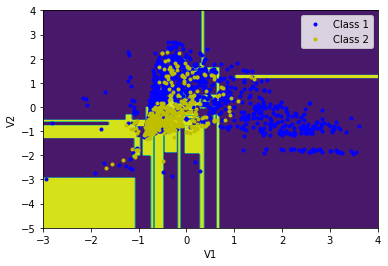

In [24]:
#Tree = ____

Z_Tree = Tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z_Tree = Z_Tree.reshape(xx.shape)
plt.contourf(xx,yy,Z_Tree)
plt.plot(X_test[y_test==1,0],X_test[y_test==1,1],'.b')
plt.plot(X_test[y_test==2,0],X_test[y_test==2,1],'.y')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(['Class 1','Class 2'])
plt.show()

## 2.3
Gini is one option for evaluating whether one decision node leads to more purity than another.

The Gini for a node with $K$ classes is defined by
$H(D) = \sum_{i=1}^K p_i (1-p_i)$

Here $p_i$ represents the probability of a data point in that leaf node belonging to class $i$.
To evaluate a split, we calculate the sum of the Ginis for the two leaf nodes. Gini is a measure of impurity so our goal is to
**minimize** the Gini impurity.

**Determine the impurity in the original (training) dataset. Compare this to the sklearn calculation in the depth-1 tree below**

In [17]:
Tree_One = tree.DecisionTreeClassifier(max_depth=1)
Tree_One.fit(X_train,y_train)
print('(sklearn) Gini Impurity in original data set: ' + str(Tree_One.tree_.impurity[0]))

(sklearn) Gini Impurity in original data set: 0.4120707596253902


In [18]:
p1 = np.sum(y_train==1)/len(X_train)
p2 = np.sum(y_train==2)/len(X_train)
gini = p1*(1-p1) + p2*(1-p2)
print('Gini Impurity in original data set: ' + str(gini))

Gini Impurity in original data set: 0.4120707596253902


## 2.4 
We can use cross validation to determine the best parameters to use for our classification model. For the case of binary trees, it can be used to determine what maximum depth to use.

**For depths from 1 to 15, perform 10-fold cross validation on your binary tree, using your full data set. Calculate and plot the mean accuracy for each depth.**
**What is the ideal maximum tree depth for our data? What do you observe as the depth increases to 20? 30?**


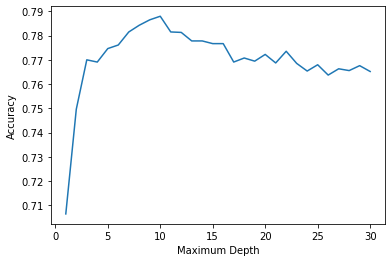

In [26]:
from sklearn.model_selection import cross_val_score

mean_accuracy=[]
n=30
for i in np.arange(n):
    Tree = tree.DecisionTreeClassifier(max_depth=i+1)
    score = cross_val_score(Tree,X,y,cv=10,scoring='accuracy')
    #print(score.shape)
    mean_score = np.mean(score)
    mean_accuracy.append(mean_score)

depths = np.arange(n)+1 #shift by 1 since the arange starts at 0
plt.plot(depths,mean_accuracy)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()

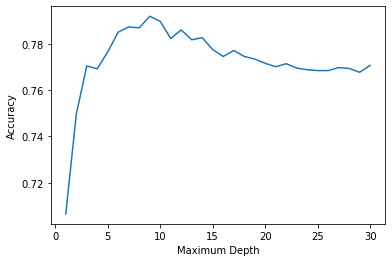

In [42]:
## An alternative solution using KFold

from sklearn.model_selection import KFold

mean_accuracy=[]
n=30
for i in np.arange(n):
    Tree = tree.DecisionTreeClassifier(max_depth=i+1)
    accuracies = []
    folds = 10
    k_fold = KFold(n_splits=folds,shuffle=True,random_state=235)

    for train_index, test_index in k_fold.split(X):
        current_tree = Tree.fit(X[train_index],y[train_index])
        y_predict = current_tree.predict(X[test_index])
        accuracies.append(accuracy_score(y_predict,y[test_index]))
    mean_accuracy.append(np.mean(accuracies))
    
mean_accuracy = np.array(mean_accuracy)

depths = np.arange(n)+1 #shift by 1 since the arange starts at 0
plt.plot(depths,mean_accuracy)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()